<a href="https://colab.research.google.com/github/ShigekiKamata/Learn/blob/main/SimmulatedAnnealing_Basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [58]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
np.seterr(divide='ignore', invalid='ignore')

# Initial Solution
x = 2
y = 1

# Objective function
z = (x**2 + y - 11)**2 + (x + y**2 - 7)**2

def f(x, y):
    return (x**2 + y - 11)**2 + (x + y**2 - 7)**2

f(x,y)


# Temperature
T0 = 1000
temp_for_plot = T0
# Number of temperture drop
M = 300
# Number of neighborhood search per a temperature
N = 15
# Cooling rate
alpha = 0.85
# Step size (how far can a solution go in one radom move)
k = 0.1

# Objective function values
df = pd.DataFrame(columns=['m', 'n','x', 'y', 'z'])
df.loc[0] = [np.NaN,np.NaN,x, y, z]

In [59]:
def make_move(num, step_size):
  rdm1 = np.random.rand()  # plus or minus
  rdm2 = np.random.rand()  # distance to travel
  if rdm1 >= 0.5:
    move = step_size * rdm2
  else:
    move = (-1) * step_size * rdm2

  return move

# Neighborhood search
for i in range(M):
  for j in range(N):
    x_move = make_move(x,k)
    y_move = make_move(y,k)

    # Temporary Solution
    x_tmp = x + x_move
    y_tmp = y + y_move

    # Temporary Objective Function
    z_tmp = f(x_tmp, y_tmp)

    # Acceptance
    if z_tmp < z:
      x = x_tmp
      y = y_tmp
      z = z_tmp
    elif np.random.rand() < np.exp(-(z_tmp - z) / temp_for_plot):
      x = x_tmp
      y = y_tmp
      z = z_tmp

    df.loc[df.shape[0]] = [i,j,x, y, z]

  # Cooling
  T0 = alpha * T0
  temp_for_plot = T0
  if i%20==0: print(f'T = {T0}')





T = 850.0
T = 32.945601421837196
T = 1.2769560624077185
T = 0.049494218194450997
T = 0.0019183726886115584
T = 7.435522585592306e-05
T = 2.8819736878587335e-06
T = 1.1170394873931299e-07
T = 4.329592673424398e-09
T = 1.6781298180887851e-10
T = 6.504352484806268e-12
T = 2.5210565231948657e-13
T = 9.771496867658906e-15
T = 3.7873863658425996e-16
T = 1.46797319575942e-17


In [60]:
df.head()

,m,n,x,y,z
0,NaN,NaN,2.000000,1.000000,52.000000
1,0.0,0.0,2.044055,1.054117,48.048962
2,0.0,1.0,2.073920,1.147270,43.851105
3,0.0,2.0,2.043201,1.177991,44.631192
4,0.0,3.0,1.944462,1.171467,50.139431


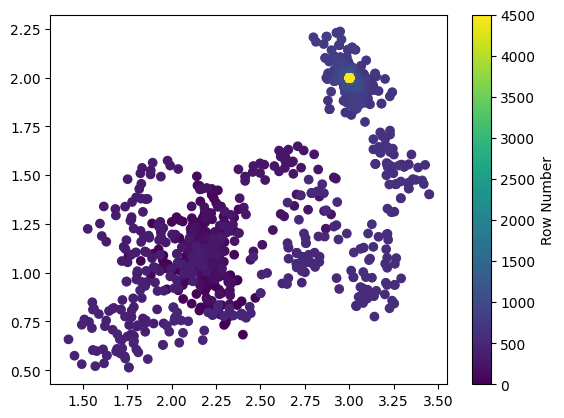

In [61]:
# Scatter plot
# df.plot(x='x', y='y', kind='scatter')
plt.scatter(df['x'], df['y'], c=np.arange(len(df)), cmap='viridis')
plt.colorbar(label='Row Number')
plt.show()

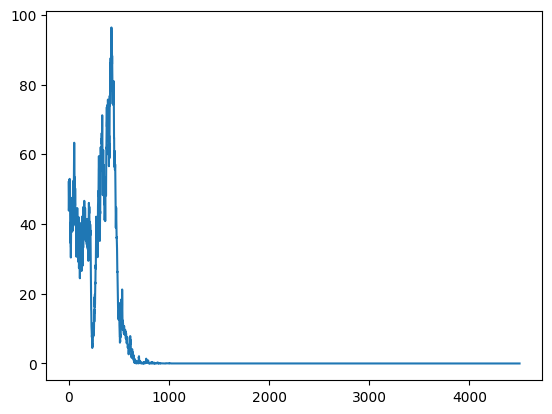

In [62]:
# How z changes
plt.plot(df['z'])
plt.show()

In [63]:
# How
df.to_excel('scores.xlsx')